In [2]:
# Quantitative Marketing
# Assignment 1 - Avazu Kaggle competition

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


In [50]:
# now we set up the iteration and model the entire dataset
chunk_iter = pd.read_csv("trainshuf.csv", chunksize=10 ** 5, names=['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', \
                                                                      'site_domain', 'site_category', 'app_id','app_domain', \
                                                                      'app_category', 'device_id', 'device_ip', \
                                                                      'device_model', 'device_type', 'device_conn_type', \
                                                                      'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

# we are not using a prior and we implement binarization afterwards
# the label encoder in current state is a remnant of prevous versions that would be tedious to remove
nb_train = BernoulliNB(binarize=1) 
le = LabelEncoder()

In [51]:
# to get these values we need to change the for loop
results = pd.DataFrame(np.zeros((10 * 43, 3)), columns=['current test CTR', 'predicted CTR', 'SSR'])


In [5]:
#dictionaries for splitting the dataset into chunks
df = {}
for i in range(1, 46):
    df["train{0}".format(i)] = chunk_iter.get_chunk()


In [7]:
df.keys()

dict_keys(['train1', 'train2', 'train3', 'train4', 'train5', 'train6', 'train7', 'train8', 'train9', 'train10', 'train11', 'train12', 'train13', 'train14', 'train15', 'train16', 'train17', 'train18', 'train19', 'train20', 'train21', 'train22', 'train23', 'train24', 'train25', 'train26', 'train27', 'train28', 'train29', 'train30', 'train31', 'train32', 'train33', 'train34', 'train35', 'train36', 'train37', 'train38', 'train39', 'train40', 'train41', 'train42', 'train43', 'train44', 'train45'])

In [8]:
df['train1'].head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,12300420997327359576,0,14102100,1005,1,7dd19f44,9690165f,f028772b,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
1,18161237095837920981,0,14102107,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79
2,2432310864658752875,1,14102608,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,22224,320,50,2561,0,687,-1,51
3,11406021614615161880,0,14102603,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15703,320,50,1722,0,35,-1,79
4,2045866933268653706,0,14102410,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,...,1,3,21191,320,50,2424,1,161,100189,71


In [ ]:
# after we load the chunks we need to change the variable types
    
for j in range(1, 46):
    
    d = df["train{0}".format(j)]
    d = d.drop('id', axis=1)
    d = d.drop('C1', axis=1)
    d = d.drop('C14', axis=1)
    hours = [str(k)[-2:] for k in d['hour']]
    d['hours_clean'] = hours
    d = d.drop('hour', axis=1)
    d.loc[:, 'C20'] = d.loc[:, 'C20'] + 1 # there are values -1 and those are not allowed in NB
    
    for k in d.loc[:, 'site_id':'device_model'].keys():
        le.fit(d.loc[:, k].unique())
        d.loc[:, k] = le.transform(d.loc[:, k])
    
    df["train{0}".format(j)] = d
    
    print(j)

In [10]:
test = df['train45']
test.head()

,click,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,device_type,device_conn_type,C15,C16,C17,C18,C19,C20,C21,hours_clean
4400000,0,0,771,1028,5,293,13,18,9783,66825,...,1,2,320,50,2515,1,161,100190,71,14
4400001,0,0,178,1247,1,1197,39,0,11386,32448,...,1,0,320,50,761,3,175,0,23,00
4400002,0,0,771,1028,5,748,60,2,11386,60919,...,1,3,320,50,2424,1,161,100194,71,02
4400003,0,0,771,1028,5,1249,4,2,11386,52932,...,1,2,320,50,122,3,1327,0,15,04
4400004,0,0,178,1247,1,1197,39,0,11386,73415,...,1,0,320,50,2502,0,35,100085,221,15


In [11]:
type(df['train1'])

pandas.core.frame.DataFrame

In [52]:
# %%timeit
# our actual calculation
for j in range(0, 10):
    for i in range(1, 44):
        g = np.random.randint(low = 1, high = 44)
        d = df["train{0}".format(g)]

        # then we fit the Naive Bayes
        fit_train = nb_train.partial_fit(X=d.iloc[:, 1:], y = d.iloc[:, 0], classes=[0, 1])
        pred_full = fit_train.predict_proba(test.iloc[:, 1:])

        results.iloc[j * 43 + (i - 1), :] = [np.mean(test.iloc[:, 0]), np.mean(pred_full[:, 1]), \
                                             (np.mean(test.iloc[:, 0]) \
                                                     - np.mean(pred_full[:, 1])) ** 2]
    
    print(j)

0
1
2
3
4
5
6
7
8
9


   current test CTR  predicted CTR       SSR
0           0.16784       0.173944  0.000037
1           0.16784       0.173655  0.000034
2           0.16784       0.173860  0.000036
3           0.16784       0.173888  0.000037
4           0.16784       0.173673  0.000034


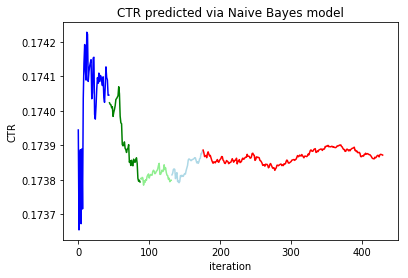

In [75]:
print(results.head())
results.iloc[:44, 1].plot(c='blue')
results.iloc[44:88, 1].plot(c='green')
results.iloc[88:132, 1].plot(c='lightgreen')
results.iloc[132:176, 1].plot(c='lightblue')
results.iloc[176:, 1].plot(c='red')
plt.title('CTR predicted via Naive Bayes model')
plt.xlabel('iteration')
plt.ylabel('CTR')
# plt.savefig('nbCTR.png', dpi = 1000)
plt.show()

   current test CTR  predicted CTR       SSR
0           0.16784       0.173944  0.000037
1           0.16784       0.173655  0.000034
2           0.16784       0.173860  0.000036
3           0.16784       0.173888  0.000037
4           0.16784       0.173673  0.000034


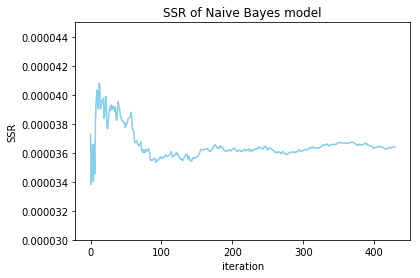

In [82]:
print(results.head())
results.iloc[:, 2].plot(c='skyblue', ylim=(0.00003, 0.000045))
plt.title('SSR of Naive Bayes model')
plt.xlabel('iteration')
plt.ylabel('SSR')
plt.savefig('nbSSR.png', dpi = 1000)
plt.show()

In [59]:
logit_pred = pd.read_csv('logit_pred.csv')

In [68]:
type(logit_pred)

pandas.core.frame.DataFrame

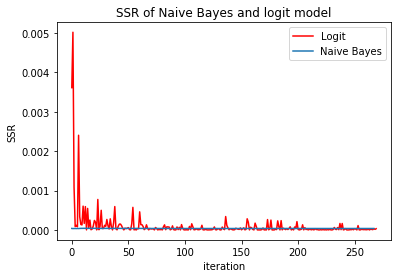

In [90]:
plt.plot(logit_pred, c='red', label='Logit')
results.iloc[:268, 2].plot(label='Naive Bayes')
plt.title('SSR of Naive Bayes and logit model')
plt.xlabel('iteration')
plt.ylabel('SSR')
plt.legend()
plt.savefig('nb_logit_SSR.png', dpi = 1000)
plt.show()

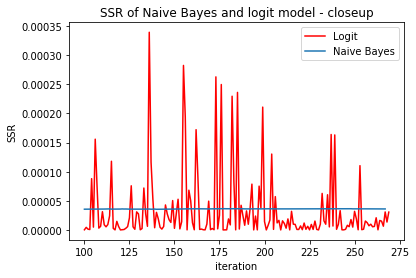

In [91]:
plt.plot(logit_pred[100:], c='red', label='Logit')
results.iloc[100:268, 2].plot(label='Naive Bayes')
plt.title('SSR of Naive Bayes and logit model - closeup')
plt.xlabel('iteration')
plt.ylabel('SSR')
plt.legend()
plt.savefig('nb_logit_SSR2.png', dpi = 1000)
plt.show()